<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/neuralnets/AND_perceptron_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
import time

s = "ABCDE"
while len(s)>0:
    clear_output(wait=True)
    print(s)
    time.sleep(1)
    s=s[:-1]
clear_output()


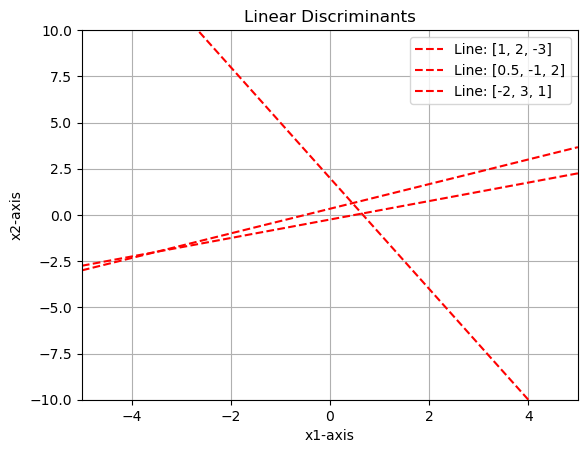

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

def plot_linear_discriminant(ax, w):
    xx = np.array([-5, 5])
    yy = (-w[0] - xx * w[1]) / w[2]
    ax.plot(xx, yy, 'r--', label=f'Line: {w}')

# Create a figure and axis
fig, ax = plt.subplots()

# Set fixed axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-10, 10)  # Adjust these limits as necessary for your data

# Example weights
weights = [  #lines will be in the ax+by+c = 0 form, but they can be converted to y = mx+b (note that we use x1,x2 instead of x,y)
    #in  the order of [w0, w1, w2]
    [1, 2, -3],    #2x1-3x2+1=0 --> x2 = (2/3)x1+(1/3)
    [0.5, -1, 2],  #-x1+2x2+0.5=0
    [-2, 3, 1]     #3x1+x2-2=0
]

# Plot each line with a pause in between
for w in weights:
    plot_linear_discriminant(ax, w)
    ax.legend()
    ax.set_xlabel('x1-axis')
    ax.set_ylabel('x2-axis')
    ax.set_title('Linear Discriminants')
    ax.grid(True)
    display(fig)
    clear_output(wait=True)
    time.sleep(0.5)

# Show the final plot
plt.show()


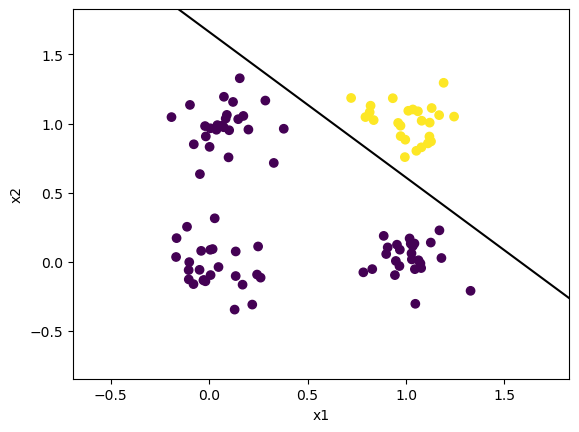

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
# Linear Perceptron: Implementation follows the approach described on Slide 10 of:
# https://www.cmpe.boun.edu.tr/~ethem/i2ml3e/3e_v1-0/i2ml3e-chap11.pdf

import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.datasets import make_blobs
from IPython.display import display, clear_output
import time

def sigmoid(a):
    return 1 / (1 + exp(-a))

def plot_linear_discriminant(w):
    plt.scatter(data[:, 0], data[:, 1], c=target)
    plt.xlabel('x1')
    plt.ylabel('x2')
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    xx = np.array([-5, 5])
    yy = (-w[0] - xx * w[1]) / w[2]
    plt.plot(xx, yy, 'k-')
    plt.show()

d = 2  # number of dimensions
n_samples = 100
cluster_std = 0.15
mean0 = [0, 0]
mean1 = [1, 0]
mean2 = [1, 1]
mean3 = [0, 1]
pos_class = 2  # which center is positive?

data, target = make_blobs(n_samples=n_samples, n_features=2,
      centers=[mean0, mean1, mean2, mean3], cluster_std=cluster_std, random_state=1)

pos_examples = target == pos_class
neg_examples = target != pos_class
target[pos_examples] = 1
target[neg_examples] = 0

#linear perceptron
Nepochs = 50
eta = 0.5  # learning rate
train_x = np.insert(data, 0, 1, axis=1)

accuracies = [] #to keep track of accuracies as a function of epochs
losses = [] #to keep track of loss as a function of epochs

init_randomly = False

if init_randomly:
    rng = np.random.RandomState(1234567)
    w = rng.randn(d+1) / 5  # 1D is sufficient until we add a hidden layer with hidden units
else:
    w = np.array([1, 1, -1], dtype='float') #a bad start to see how it would progress..

plot_linear_discriminant(w) #show the initial one, can be deliberately selected as a bad start by the previous line

for epoch in range(Nepochs + 2):  # No of times to go over the data (no updates in the first and last epochs to see accuracies)

    #eta = eta * 0.95
    display(plt.gcf())
    time.sleep(0.5)
    clear_output(wait=True)

    numcorr = 0  #number of correct classifications needed for accuracy calculation
    total_error = 0  #negative-log-likelihood needed for error calculation
    for t in range(n_samples):
        r = target[t]
        x = train_x[t, :]
        o = np.dot(x, w)
        y = sigmoid(o)
        if (y > 0.5 and r == 1) or (y <= 0.5 and r == 0):
            numcorr = numcorr + 1  # this calculates the training accuracy

        E_t = -r * np.log2(y) - (1 - r) * np.log2(1 - y) #negative log-likelihood or cross-entropy between labels and predicted posteriors
        total_error = total_error + E_t   #accumulate total error

        # update except the first and last epochs not to affect the accuracy&error
        if epoch not in [0, Nepochs + 1]:
            delta = r - y
            w = w + eta * delta * x #SGD - stochastic gradient descend

#    w = w + dw  #batch GD

    # Accuracy and Error is expected to reduce with updates
    accuracy = numcorr / n_samples
    accuracies.append(accuracy)
    loss = total_error / n_samples
    losses.append(loss)

    plot_linear_discriminant(w)


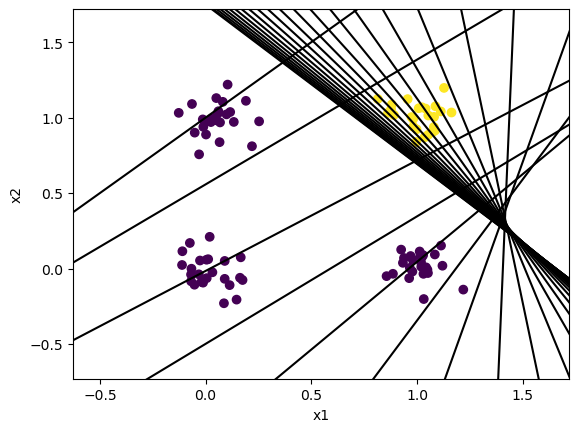

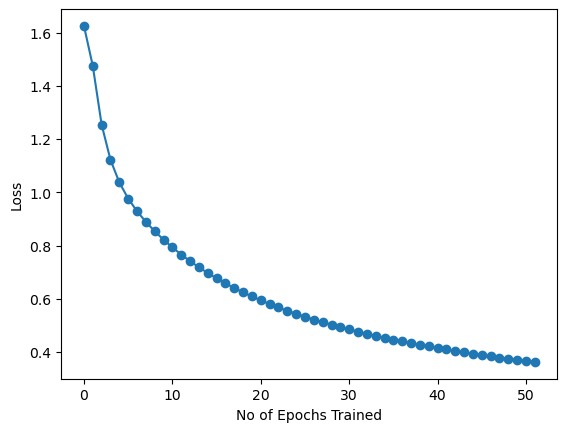

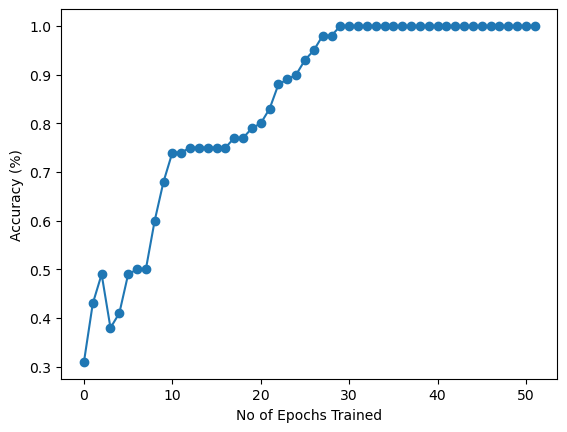

In [ ]:
# Linear Perceptron: Implementation follows the approach described on Slide 10 of:
# https://www.cmpe.boun.edu.tr/~ethem/i2ml3e/3e_v1-0/i2ml3e-chap11.pdf

import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.datasets import make_blobs
from IPython.display import display, clear_output
import time

def sigmoid(a):
    return 1 / (1 + exp(-a))

# Plot the training points
def plot_data_2D(data, labels):
    ax.scatter(data[:, 0], data[:, 1], c=labels)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
    y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    display(fig)
    clear_output(wait=True)
    time.sleep(0.5)

def plot_linear_discriminant(ax, w):
    xx = np.array([-5, 5])
    yy = (-w[0] - xx * w[1]) / w[2]
    ax.plot(xx, yy, 'k-')
    display(fig)
    clear_output(wait=True)
    time.sleep(0.5)

d = 2  # number of dimensions
n_samples = 100
cluster_std = 0.1
mean0 = [0, 0]
mean1 = [1, 0]
mean2 = [1, 1]
mean3 = [0, 1]
pos_class = 2  # which center is positive?

data, target = make_blobs(n_samples=n_samples, n_features=2,
      centers=[mean0, mean1, mean2, mean3], cluster_std=cluster_std, random_state=1)

pos_examples = target == pos_class
neg_examples = target != pos_class
target[pos_examples] = 1
target[neg_examples] = 0

# Create a figure and axis
fig, ax = plt.subplots()
plot_data_2D(data, target)

#linear perceptron
Nepochs = 50
eta = 0.01  # learning rate
train_x = np.insert(data, 0, 1, axis=1)

init_randomly = False

if init_randomly:
    rng = np.random.RandomState(1234567)
    w = rng.randn(d+1) / 5  # 1D is sufficient until we add a hidden layer with hidden units
else: #a bad start for w to see how it would progress..
    w = np.array([1, 1, -1]) #interpreting this as an array of integers can cause problems.
    w = np.array([1, 1, -1], dtype='float')

plot_linear_discriminant(ax, w) #show the initial one, can be deliberately selected as a bad start by the previous line

accuracies = [] #to keep track of accuracies as a function of epochs
losses = [] #to keep track of loss as a function of epochs
for epoch in range(Nepochs + 2):  # No of times to go over the data (no updates in the first and last epochs to see accuracies)
    numcorr = 0  #number of correct classifications needed for accuracy calculation
    total_error = 0  #negative-log-likelihood needed for error calculation

 #   eta=eta*0.9
    for t in range(n_samples):
        r = target[t]
        x = train_x[t, :]
        o = np.dot(x, w)
        y = sigmoid(o)
        if (y > 0.5 and r == 1) or (y <= 0.5 and r == 0):
            numcorr = numcorr + 1  # this calculates the training accuracy

#        implement the formula for the negative log-likelihood or cross-entropy between labels and predicted posteriors
#        clipping is a good idea to avoid y=1 and y=0, np.clip(y, epsilon, 1-epsilon) for epsilon=0.0001
#        if y>0.9999:
#            y = 0.9999  #to avoid nan or inf when y=1 we want to avoid log(1-1)
#        elif y<0.0001:
#            y = 0.0001  #avoid log(0) when y=0
#        else:
#            E_t = - (r * np.log2(y) + (1 - r) * np.log2(1 - y)) #nan

#        if r==1:
#            E_t = np.log(y) #still problems for whatever reason y=0 even if r=1
#        else: #r==0
#            E_t = np.log(1-y)

        epsilon = 0.0001
        y=np.clip(y,epsilon,1-epsilon)
        E_t = - (r * np.log2(y) + (1 - r) * np.log2(1 - y))

        total_error = total_error + E_t   #accumulate total error, will need to divide by n_samples to calculate MSE (mean squared error)

        # update except the first and last epochs not to affect the accuracy&error
        if epoch not in [0, Nepochs + 1]:
            delta = r - y

            w = w + eta * delta * x  #x is a vector and w is vector, so you dont need a for-loop here such as:
            #for j in range(d+1):
            #    w[j] = w[j] + eta * delta * x[j]

    # Accuracy and Error is expected to reduce with updates
    accuracy = numcorr / n_samples
    accuracies.append(accuracy)
    loss = total_error / n_samples
    losses.append(loss)
    print(f'{epoch=}, {accuracy=}, {loss}')

    if epoch % 2 == 1: #plot it once every 2 epochs
        plot_linear_discriminant(ax, w)

# Plot the accuracy/error values
plt.figure()
plt.plot(range(Nepochs + 2), losses, marker='o')
plt.xlabel('No of Epochs Trained')
plt.ylabel('Loss')
plt.show(block=True)

plt.figure()
plt.plot(range(Nepochs + 2), accuracies, marker='o')
plt.xlabel('No of Epochs Trained')
plt.ylabel('Accuracy (%)')
plt.show(block=True)
